# Библиотеки

In [2]:
import pandas as pd
from collections import Counter
from bs4 import BeautifulSoup
from catboost import CatBoostClassifier, CatBoostRegressor

# Предобработка

Считывание и построения дерева XML файла

In [6]:
soup = BeautifulSoup(open('data/fantasy1984.xml', mode='r', encoding='utf-8'), 'xml')

Список уникальных тегов

In [7]:
set([tag.name for tag in soup.findChildren()])

{'FirstSentence',
 'LastSentence',
 'allophone',
 'content',
 'dictitem',
 'intonation',
 'letter',
 'pause',
 'phoneme',
 'sentence',
 'stress',
 'text',
 'word'}

In [4]:
allie = [el.get('ph').lower() for el in BeautifulSoup(open('data/AlyieParusa.xml', mode='r', encoding='utf-8'), 'xml').find_all('allophone')]

In [5]:
fantasy1984 = [el.get('ph').lower() for el in BeautifulSoup(open('data/fantasy1984.xml', mode='r', encoding='utf-8'), 'xml').find_all('allophone')]

Проверка на совпадение множества аллофонов в 2 имеющихся текстах

In [6]:
set(allie) - set(fantasy1984), set(fantasy1984) - set(allie)

(set(), set())

Разница была в один аллофон и было решено проверить распределение аллофонов

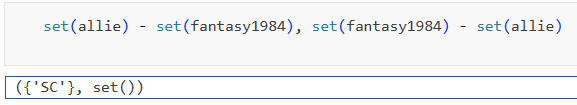

Распределение аллофонов в Алых Парусах

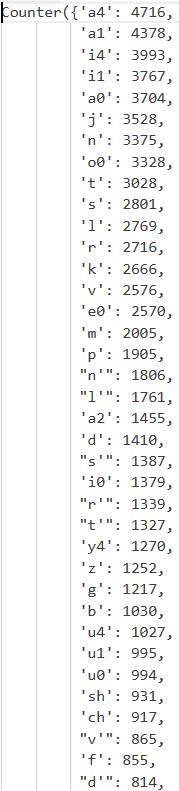
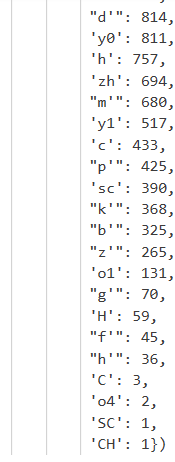

Распределение аллофонов в 1984

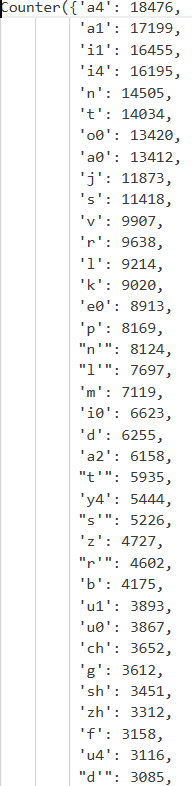
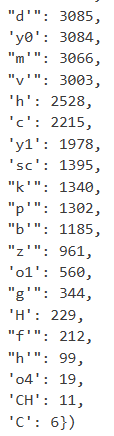

Распределения показывают, что в целом можно удалить тот самый аллофон, который отличает 1984 и Алые Паруса. Но было принято решение также приводить все значения аллофонов к нижнему регистру. В дальнейшем и в последних версиях ячеек с кодом будет использоваться именно этот вариант. 

In [7]:
Counter(fantasy1984)

Counter({'a4': 18476,
         'a1': 17199,
         'i1': 16455,
         'i4': 16195,
         'n': 14505,
         't': 14034,
         'o0': 13420,
         'a0': 13412,
         'j': 11873,
         's': 11418,
         'v': 9907,
         'r': 9638,
         'l': 9214,
         'k': 9020,
         'e0': 8913,
         'p': 8169,
         "n'": 8124,
         "l'": 7697,
         'm': 7119,
         'i0': 6623,
         'd': 6255,
         'a2': 6158,
         "t'": 5935,
         'y4': 5444,
         "s'": 5226,
         'z': 4727,
         "r'": 4602,
         'b': 4175,
         'u1': 3893,
         'u0': 3867,
         'ch': 3663,
         'g': 3612,
         'sh': 3451,
         'zh': 3312,
         'f': 3158,
         'u4': 3116,
         "d'": 3085,
         'y0': 3084,
         "m'": 3066,
         "v'": 3003,
         'h': 2757,
         'c': 2221,
         'y1': 1978,
         'sc': 1395,
         "k'": 1340,
         "p'": 1302,
         "b'": 1185,
         "z'": 961,


Отсортируем полученные аллофоны по их фонемной части

In [8]:
sorted(Counter(fantasy1984).items(), key=lambda x: x[0] )

[('a0', 13412),
 ('a1', 17199),
 ('a2', 6158),
 ('a4', 18476),
 ('b', 4175),
 ("b'", 1185),
 ('c', 2221),
 ('ch', 3663),
 ('d', 6255),
 ("d'", 3085),
 ('e0', 8913),
 ('f', 3158),
 ("f'", 212),
 ('g', 3612),
 ("g'", 344),
 ('h', 2757),
 ("h'", 99),
 ('i0', 6623),
 ('i1', 16455),
 ('i4', 16195),
 ('j', 11873),
 ('k', 9020),
 ("k'", 1340),
 ('l', 9214),
 ("l'", 7697),
 ('m', 7119),
 ("m'", 3066),
 ('n', 14505),
 ("n'", 8124),
 ('o0', 13420),
 ('o1', 560),
 ('o4', 19),
 ('p', 8169),
 ("p'", 1302),
 ('r', 9638),
 ("r'", 4602),
 ('s', 11418),
 ("s'", 5226),
 ('sc', 1395),
 ('sh', 3451),
 ('t', 14034),
 ("t'", 5935),
 ('u0', 3867),
 ('u1', 3893),
 ('u4', 3116),
 ('v', 9907),
 ("v'", 3003),
 ('y0', 3084),
 ('y1', 1978),
 ('y4', 5444),
 ('z', 4727),
 ("z'", 961),
 ('zh', 3312)]

Посмотрим на аллофоны, которые могут соответствовать всем возможным графемам.

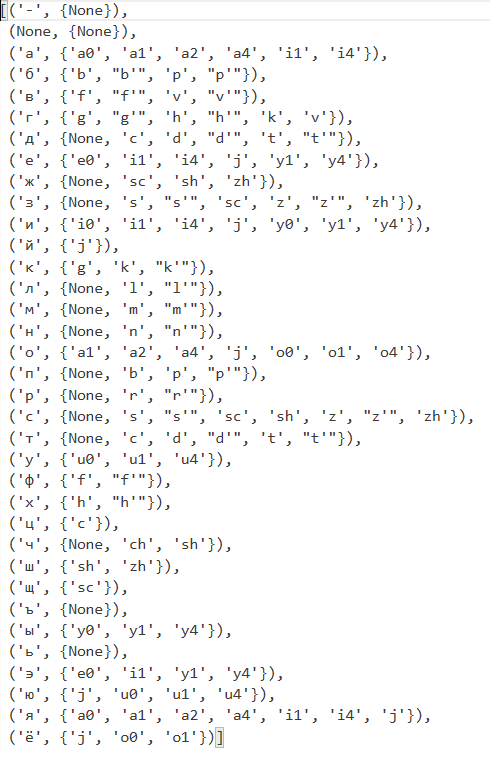

А теперь немного изменим и добавим вывод, когда у графемы нет аллофона (и фонемы тоже) для каких слов это происходит

In [3]:
stat = dict()

for cur, word in enumerate(BeautifulSoup(open('data/fantasy1984.xml', mode='r', encoding='utf-8'), 'xml').find_all('word')):
    children_tags = word.findChildren()
    it = 0

    while it < len(children_tags) - 2:
        if children_tags[it].name != 'letter':
            it += 1
        elif children_tags[it + 1].name != 'phoneme':
            char = children_tags[it].get('char')
            if char not in stat.keys():
                stat[char] = set([(None, word.text)])
            else:
                stat[char].add((None, word.text))

            it += 1
        else:
            # print(f'{children_tags[it]=}\n{children_tags[it+1]=}\n{children_tags[it+2]=}')
            char = children_tags[it].get('char')
            allophone = children_tags[it+2].get('ph').lower()
            if char not in stat.keys():
                stat[char] = set([allophone])
            else:
                stat[char].add(allophone)
            it += 3
    
    # print('-'*50)

Список графем и, если, после нее нет фонемы и аллофона, слово на котором такое встречается

In [12]:
stat['ь'], stat['ъ'] = set([None]), set([None])
sorted(stat.items(), key=lambda x: str(x[0]))

[('-',
  {(None, 'взад-вперёд'),
   (None, 'во-первых'),
   (None, 'волей-неволей'),
   (None, 'вообще-то'),
   (None, 'вот-вот'),
   (None, 'всего-навсего'),
   (None, 'всё-таки'),
   (None, 'где-нибудь'),
   (None, 'где-то'),
   (None, 'давным-давно'),
   (None, 'еле-еле'),
   (None, 'из-за'),
   (None, 'из-под'),
   (None, 'как-нибудь'),
   (None, 'как-то'),
   (None, 'какая-либо'),
   (None, 'какая-нибудь'),
   (None, 'какая-то'),
   (None, 'какие-нибудь'),
   (None, 'какие-то'),
   (None, 'каким-то'),
   (None, 'каких-нибудь'),
   (None, 'какого-либо'),
   (None, 'какого-нибудь'),
   (None, 'какого-то'),
   (None, 'какое-то'),
   (None, 'какой-либо'),
   (None, 'какой-нибудь'),
   (None, 'какой-то'),
   (None, 'каком-то'),
   (None, 'какому-то'),
   (None, 'какую-нибудь'),
   (None, 'какую-то'),
   (None, 'кем-то'),
   (None, 'кисло-сладкий'),
   (None, 'когда-либо'),
   (None, 'когда-нибудь'),
   (None, 'когда-то'),
   (None, 'кого-нибудь'),
   (None, 'кого-то'),
   (None, 'кое-г

Посчитаем количество слов, в которых есть графема с отсутствующим после нее фонемой и аллофоном

In [9]:
wrong = 0
for word in soup.find_all('word'):
    letter_amount = len(word.find_all('letter'))
    allophone_amount = len(word.find_all('allophone'))

    letters = [letter.get('char') for letter in word.find_all('letter')]
    allophones = [allophone.get('ph') for allophone in word.find_all('allophone')]

    # assert letter_amount == allophone_amount, f'{word.text=} {letter_amount=} {allophone_amount=}'
    if letter_amount != allophone_amount:
        wrong += 1
        # print( f"{word.text=} {letters=} {allophones=}" )

In [10]:
len(soup.find_all('word')), wrong

(60500, 13832)

Обработка и получение признаков

In [5]:
def get_features(xml_filename: str = None, csv_filename: str = None):
    phoneme_vowel = ['y', 'i', 'o', 'a', 'u', 'e']
    phoneme_consonant = ['sh', 's', 't', 'l', 'k', 'r', 'n', 'j', 'b', 'z','v','g','h','d','ch','f','m','zh','c','p','sc']
    grapheme_vowel = ["а", "е", "ё", "и", "о", "у", "ы", "э", "ю", "я"]
    grapheme_consonant = ["б", "в", "г", "д", "ж", "з", "й", "к", "л", "м", "н", "п", "р", "с", "т", "ф", "х", "ц", "ч", "ш", "щ", "ъ", "ь"]
    doubling = ['sh', 'sc', 'zh', 'ch']
    
    soup = BeautifulSoup(open(xml_filename, mode='r', encoding='utf-8'), 'xml')
    
    original = []
    lenWord = []
    wordForm = []
    # Знаки препинания и эмфазы на слове
    punktEnd = []
    punktBeg = []
    emphEnd = []
    emphBeg = []
    # Паузы
    isPause = []
    lenPause = []
    # Слова
    nucleus = []
    semantics1 = []
    semantics2 = []
    countBeforeWords = []
    countAfterWords = []
    beforeWords = []
    afterWords = []
    capitalized = []
    indexInSentence = []
    subpartOfSpeech = []

    for sentence in soup.find_all('sentence'):
        for i, el in enumerate(sentence.findChildren()):
            if el.name == 'content':
                if el.get('PauseType'):
                    isPause.append(1)
                else:
                    isPause.append(0)

                punktBeg.append(el.get('PunktBeg'))
                punktEnd.append(el.get('PunktEnd'))
                emphEnd.append(el.get('EmphEnd'))
                emphBeg.append(el.get('EmphBeg'))

            if el.name == 'pause':
                lenPause.append(int(el.get('time')))

            if el.name == 'word':
                lenWord.append(len(el.get('original')) if el.get('original') else 0)
                original.append(el.get('original'))
                nucleus.append(el.get('nucleus'))
                wordForm.append(int(el.find('dictitem').get('form')))
                semantics1.append(el.find('dictitem').get('semantics1'))
                semantics2.append(el.find('dictitem').get('semantics2'))
                subpartOfSpeech.append(el.find('dictitem').get('subpart_of_speech'))

                indexInSentence.append(i)

                if original[-1]:
                    capitalized.append(original[-1] == original[-1].lower().capitalize())
                else:
                    capitalized.append(None)



    for i, v in enumerate(original):
        countAfterWords.append(len(original) - i)
        countBeforeWords.append(i)

        if i == 0:
            beforeWords.append(None)
        else:
            beforeWords.append(original[i - 1])

        if i == len(original) - 1:
            afterWords.append(None)
        else:
            afterWords.append(original[i + 1])

    # Ставим метки длины пауз
    pauses = 0
    newLenPause = []
    for i in range(len(isPause)):
        if isPause[i]:
            newLenPause.append(lenPause[pauses])
            pauses += 1
        else:
            newLenPause.append(-1)
    lenPause = newLenPause

    # Переводим данные в pandas.DataFrame

    df = pd.DataFrame()

    df['original'] = original
    df['lenWord'] = lenWord
    df['wordForm'] = wordForm
    # Знаки препинания и эмфазы на слове
    df['punktEnd'] = punktEnd
    df['punktBeg'] = punktBeg
    df['emphEnd'] = emphEnd
    df['emphBeg'] = emphBeg
    # Паузы
    df['isPause'] = isPause
    df['lenPause'] = lenPause
    # Слова
    df['nucleus'] = nucleus
    df['semantics1'] = semantics1
    df['semantics2'] = semantics2
    df['countBeforeWords'] = countBeforeWords
    df['countAfterWords'] = countAfterWords
    df['beforeWords'] = beforeWords
    df['afterWords'] = afterWords
    df['capitalized'] = capitalized
    df['indexInSentence'] = indexInSentence
    df['subpartOfSpeech'] = subpartOfSpeech
    df['nucleus_labels'] = [el == '2' for el in nucleus]

    df = df.fillna('None') # Заполняем пустые места строкой

    df.to_csv(csv_filename)

    return df

In [6]:
df = get_features(xml_filename='data/fantasy1984.xml', csv_filename='markup/df.csv')

Смотрим на распределения данных

array([[<Axes: title={'center': 'lenWord'}>,
        <Axes: title={'center': 'wordForm'}>,
        <Axes: title={'center': 'isPause'}>],
       [<Axes: title={'center': 'lenPause'}>,
        <Axes: title={'center': 'countBeforeWords'}>,
        <Axes: title={'center': 'countAfterWords'}>],
       [<Axes: title={'center': 'indexInSentence'}>, <Axes: >, <Axes: >]],
      dtype=object)

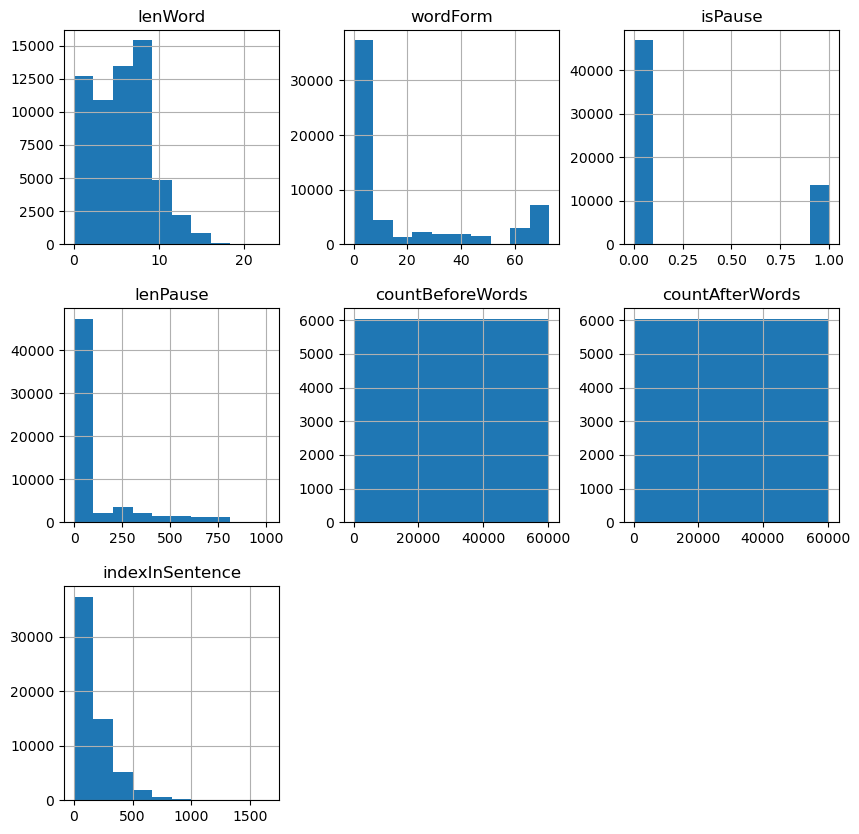

In [7]:
df.hist(figsize=(10, 10))

Сделаем обработку для второго файла (а данном случае Алые Паруса)

In [8]:
df_val = get_features(xml_filename='data/AlyieParusa.xml', csv_filename='markup/df_test.csv')

Распределения для текста Алые Паруса

array([[<Axes: title={'center': 'lenWord'}>,
        <Axes: title={'center': 'wordForm'}>,
        <Axes: title={'center': 'isPause'}>],
       [<Axes: title={'center': 'lenPause'}>,
        <Axes: title={'center': 'countBeforeWords'}>,
        <Axes: title={'center': 'countAfterWords'}>],
       [<Axes: title={'center': 'indexInSentence'}>, <Axes: >, <Axes: >]],
      dtype=object)

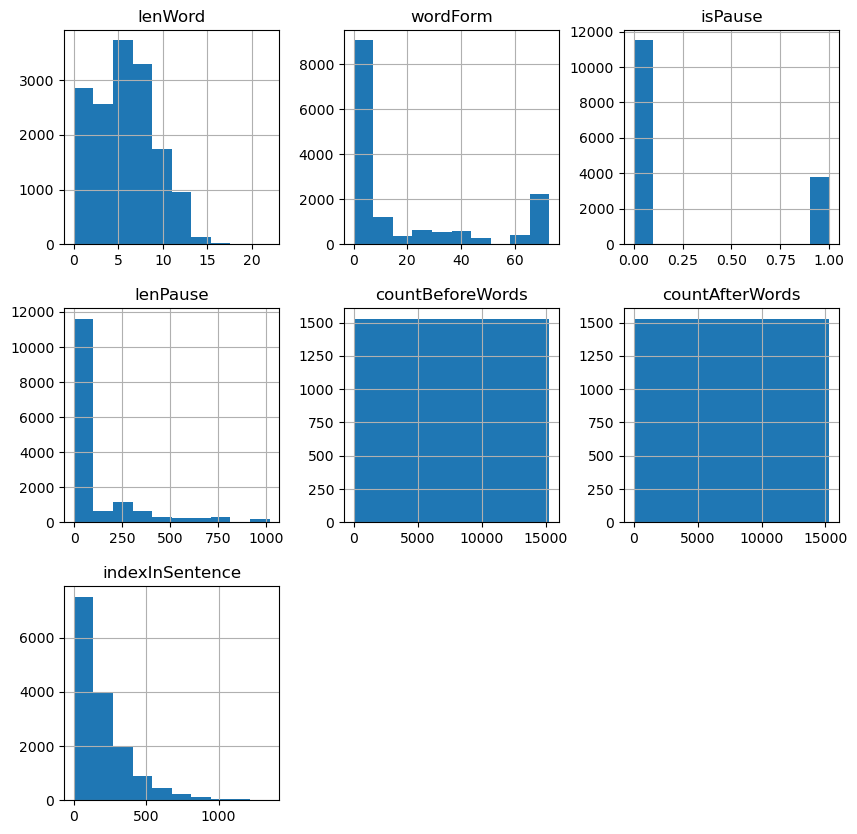

In [9]:
df_val.hist(figsize=(10, 10))

# Обучение классификтора для определения паузы и регрессора для определения длины паузы

Объединим оба файла в один, для проведения окончательного обучения

In [10]:
df_cat = pd.concat([df, df_val], ignore_index=True)

In [ ]:
def my_tokenizer(word : str):
    return list(word)

In [ ]:
token_transform = {}
vocab_transform = {}

SRC_LANGUAGE = 'grapheme'
TGT_LANGUAGE = 'phoneme'

token_transform[SRC_LANGUAGE] = my_tokenizer
token_transform[TGT_LANGUAGE] = my_tokenizer

def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Training data Iterator
    all_iter=all_data
    # Create torchtext's Vocab object
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(all_data, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])


In [ ]:
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)


In [ ]:
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)

In [ ]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

In [ ]:
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))


text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], 
                                               vocab_transform[ln], 
                                               tensor_transform) 


def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

In [ ]:
def train_function(model, optimizer):
    model.train()
    losses = 0
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in tqdm(train_dataloader):
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()

    return losses / len(train_dataloader)

In [ ]:
def evaluate_function(model):
    model.eval()
    losses = 0

    val_iter=test_iter
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(val_dataloader)

In [ ]:
torch.manual_seed(42)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 5
NUM_DECODER_LAYERS = 5

g2p_model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in g2p_model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

g2p_model = g2p_model.to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(g2p_model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

In [ ]:
NUM_EPOCHS = 25

stats_for_plotting={"train_losses":[],"test_losses":[]}
for epoch in range(1, NUM_EPOCHS+1):
    train_loss = train_function(g2p_model, optimizer)
    end_time = timer()
    val_loss = evaluate_function(g2p_model)
    torch.save(g2p_model.state_dict(),f"best_model.pth")

In [ ]:
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


In [ ]:
def inference(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

# Построение классификатора для глассных

Загрузим модель

In [ ]:
torch.manual_seed(42)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 5
NUM_DECODER_LAYERS = 5

g2p_model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in g2p_model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

g2p_model.load_state_dict(torch.load('model-trasnformer-g2p-lower/best_model_lower.pth', map_location=torch.device('cpu')))
g2p_model = g2p_model.to(DEVICE)

### Построение классификатора гласных букв

In [ ]:
def catboost_GridSearchCV(X, y, params, cat_features, n_splits=2):
    ps = {'f1':0,
          'param': []
    }
    
    predict=None
    
    for prms in tqdm(list(ParameterGrid(params)), ascii=True, desc='Params Tuning:'):
                          
        f1 = cross_val(X, y, prms, cat_features, n_splits=n_splits)

        if f1>ps['f1']:
            ps['f1'] = f1
            ps['param'] = prms
    print('F1: '+str(ps['f1']))
    print('Params: '+str(ps['param']))
    
    return ps['param']

In [ ]:
def cross_val(X, y, param, cat_features, n_splits=3):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    f1_list = []
    predict = None
    
    for tr_ind, val_ind in skf.split(X, y):
#         print(tr_ind)
        X_train = X.loc[tr_ind]
        y_train = y[tr_ind]
        
        X_valid = X.loc[val_ind]
        y_valid = y[val_ind]
        
        clf = CatBoostClassifier(iterations=500,
                                loss_function = param['loss_function'],
                                depth=param['depth'],
                                l2_leaf_reg = param['l2_leaf_reg'],
                                eval_metric = 'TotalF1',
                                leaf_estimation_iterations = 10,
                                use_best_model=True,
                                logging_level='Silent',
#                                 class_weights =dct_weights,
                                task_type="GPU",
                                devices='0',
                                learning_rate=1
        )
        
        clf.fit(X_train, 
                y_train,
                cat_features=cat_features,
                eval_set=(X_valid, y_valid)
        )
        
        y_pred = clf.predict(X_valid)
        f1 = f1_score(y_valid, y_pred, average='weighted')
        f1_list.append(f1)
    return sum(f1_list)/n_splits

In [ ]:
categorical_features_names = ['original', 'lenWord', 'wordForm', 'punktEnd', 'punktBeg', 'emphEnd', 'emphBeg', 'nucleus', 'semantics1', 
                              'semantics2', 'countBeforeWords', 'countAfterWords', 'beforeWords', 'afterWords', 'capitalized', 
                              'indexInSentence', 'subpartOfSpeech']

In [ ]:
params = {'depth':[2, 3, 4],
          'loss_function': ['MultiClassOneVsAll', 'MultiClass'],
          'l2_leaf_reg':np.logspace(-20, -19, 3)
}

param = catboost_GridSearchCV(df, y, params, categorical_features_names)
print(param)

Params Tuning::   0%|          | 0/18 [00:00<?, ?it/s]

F1: 0.9932501014355002
Params: {'depth': 3, 'l2_leaf_reg': 3.162277660168379e-20, 'loss_function': 'MultiClassOneVsAll'}
{'depth': 3, 'l2_leaf_reg': 3.162277660168379e-20, 'loss_function': 'MultiClassOneVsAll'}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    train_size=0.9,
                                                    stratify=y
                                                   )

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

clf = CatBoostClassifier(iterations=3500,
                        loss_function = param['loss_function'],
                        depth=param['depth'],
                        l2_leaf_reg = param['l2_leaf_reg'],
                        eval_metric = 'TotalF1',
                        leaf_estimation_iterations = 10,
                        use_best_model=True,
                        task_type="GPU",
#                         class_weights =(1, 2.89),
                        devices='0',
                        metric_period=250
                        )

In [ ]:
clf.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=True, cat_features=categorical_features_names)

In [ ]:
clf.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=True, cat_features=categorical_features_names)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
target_names = [vocab_transform[TGT_LANGUAGE].lookup_tokens([x])[0] for x in np.unique(y)]

### Классификация ударений гласных

In [ ]:
y = np.array([int(x) for x in df['nucleus']])

In [ ]:
params = {'depth':[2, 3, 4],
          'loss_function': ['MultiClassOneVsAll', 'MultiClass'],
          'l2_leaf_reg':np.logspace(-20, -19, 3)
}

param = catboost_GridSearchCV(df, y, params, categorical_features_names)
print(param)

Params Tuning::   0%|          | 0/18 [00:00<?, ?it/s]

F1: 0.9596104592631142
Params: {'depth': 4, 'l2_leaf_reg': 1e-20, 'loss_function': 'MultiClassOneVsAll'}
{'depth': 4, 'l2_leaf_reg': 1e-20, 'loss_function': 'MultiClassOneVsAll'}


In [ ]:
params = {'depth':[2, 3, 4],
          'loss_function': ['MultiClassOneVsAll', 'MultiClass'],
          'l2_leaf_reg':np.logspace(-20, -19, 3)
}

param = catboost_GridSearchCV(df, y, params, categorical_features_names)
print(param)

Params Tuning::   0%|          | 0/18 [00:00<?, ?it/s]

F1: 0.9584631663565271
Params: {'depth': 4, 'l2_leaf_reg': 1e-20, 'loss_function': 'MultiClassOneVsAll'}
{'depth': 4, 'l2_leaf_reg': 1e-20, 'loss_function': 'MultiClassOneVsAll'}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    train_size=0.9,
                                                    stratify=y
                                                   )

In [ ]:
clf_nuclear = CatBoostClassifier(iterations=3500,
                        loss_function = param['loss_function'],
                        depth=param['depth'],
                        l2_leaf_reg = param['l2_leaf_reg'],
                        eval_metric = 'TotalF1',
                        leaf_estimation_iterations = 10,
                        use_best_model=True,
                        task_type="GPU",
                        class_weights = dct_weights,
                        devices='0',
                        metric_period=250
                        )

In [ ]:
clf_nuclear.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=True, cat_features=categorical_features_names)

## Построение классификатора для конечных аллофонов "H", "CH", "C", "SC"

In [ ]:
end_phoneme_upper = ["H", "CH", "C", "SC", "h", 'ch', 'c', 'sc']

In [ ]:
idx_ph_list = []
for idx, phoneme in tqdm(df['allophone_word'].items(), total=len(df)):
    end_ph = ' '.join(list(phoneme)).replace('s h', 'sh').replace('s c', 'sc').replace('z h', 'zh').replace('c h', 'ch').split(' ')[-1]
    if end_ph in end_phoneme_upper:
        idx_ph_list.append(idx)

In [ ]:
params = {'depth':[2, 3, 4],
          'loss_function': ['MultiClassOneVsAll', 'MultiClass'],
          'l2_leaf_reg':np.logspace(-20, -19, 3)
}

param = catboost_GridSearchCV(df, y, params, categorical_features_names)
print(param)

Params Tuning::   0%|          | 0/18 [00:00<?, ?it/s]

F1: 0.9843722227021918
Params: {'depth': 4, 'l2_leaf_reg': 1e-20, 'loss_function': 'MultiClass'}
{'depth': 4, 'l2_leaf_reg': 1e-20, 'loss_function': 'MultiClass'}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    train_size=0.9,
                                                    stratify=y
                                                   )

In [ ]:
clf_ends_upper_allophone = CatBoostClassifier(iterations=3500,
                        loss_function = param['loss_function'],
                        depth=param['depth'],
                        l2_leaf_reg = param['l2_leaf_reg'],
                        eval_metric = 'TotalF1',
                        leaf_estimation_iterations = 10,
                        use_best_model=True,
                        task_type="GPU",
                        class_weights = dct_weights,
                        devices='0',
                        metric_period=250
                        )

In [ ]:
clf_ends_upper_allophone.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=True, cat_features=categorical_features_names)

# Тестирование

Функция для проведения тестирования

In [35]:
def test(filename: str = None) -> None:
    df = get_features(xml_filename=filename, csv_filename='test.csv')

    columns = ['original', 'lenWord', 'wordForm', 'punktEnd', 'punktBeg', 'emphEnd', 'emphBeg', 'semantics1', 'semantics2', 
               'countBeforeWords', 'countAfterWords', 'beforeWords', 'afterWords', 'capitalized', 'indexInSentence', 'subpartOfSpeech']

    pauses_cls = CatBoostClassifier()
    pauses_cls.load_model('models/isPause.cbm')
    places_of_pauses = pauses_cls.predict(df[columns])

    nucleus_cls = CatBoostClassifier()
    nucleus_cls.load_model('models/nucleus.cbm')
    places_of_nucleus = nucleus_cls.predict(df[columns])

    pauses_reg = CatBoostRegressor()
    pauses_reg.load_model('models/lenPauses.cbm')
    len_pauses = pauses_reg.predict(df[columns])

    result = {'words': []}

    for i, v in enumerate(df['original']):
        word = {}
        word['content'] = v
        word['phrasal_stress'] = True if places_of_nucleus[i] == 'True' else False
        word['pause_len'] = int(len_pauses[i]) if places_of_pauses[i] else -1
        result['words'].append(word)
    
    import json
    with open('test.json', mode='w+', encoding='utf-8') as file:
        json.dump([result], file, indent=4, ensure_ascii=False)
    


Вызов функции для тестирования и получения json файла. В аргументы пишется название файла разметки

In [36]:
test('data/fantasy1984.xml')